In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

import psycopg2
import db_config as cfg

# Import modules to declare columns and column data types
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

from sqlalchemy import Column, Integer, String, Float

#cfg.mysql

In [3]:
#  Setup DbString for URI 
dbHost = cfg.mysql['host']
dbUser = cfg.mysql['user']
dbPort = cfg.mysql['port']
dbPwd  = cfg.mysql['pwd']
dbName = cfg.mysql['db']
dbString = f'postgres+psycopg2://{dbUser}:{dbPwd}@{dbHost}:{dbPort}/{dbName}'

#dbString

In [4]:
## CONNECT TO POSTGRESS DB
# from sqlalchemy import create_engine
# import psycopg2
# import pandas as pd

DATABASE_URI = dbString
engine = create_engine(DATABASE_URI)
#engine

In [37]:
salary_df = pd.read_sql("SELECT salary FROM salaries", engine)
salary_df.head()

,salary
0,60117.0
1,65828.0
2,40006.0
3,40054.0
4,78228.0


In [38]:
salary_df.describe()

,salary
count,300024.000000
mean,52970.732451
std,14301.478491
min,40000.000000
25%,40000.000000
50%,48681.000000
75%,61758.000000
max,129492.000000


In [198]:
#engine

In [56]:
title_df = pd.read_sql("SELECT tt.title FROM titles as tt", engine)
title_df.head()

,title
0,Senior Engineer
1,Staff
2,Senior Engineer
3,Engineer
4,Senior Engineer


In [174]:
qString = "SELECT tt.title, s.salary \
    FROM titles as tt \
    JOIN salaries as s \
    ON tt.emp_no = s.emp_no"

title_sal_df = pd.read_sql(qString, engine)
title_sal_df.head()

,title,salary
0,Senior Staff,78228.0
1,Staff,78228.0
2,Engineer,72488.0
3,Staff,42365.0
4,Engineer,55881.0


In [181]:
means_df = title_sal_df.groupby('title').mean()
means_df

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


In [205]:
std_df = title_sal_df.groupby('title').std()
std_df

,salary
title,
Assistant Engineer,10247.593341
Engineer,10316.455234
Manager,12068.128725
Senior Engineer,10252.364539
Senior Staff,16505.512022
Staff,16499.346126
Technique Leader,10313.486129


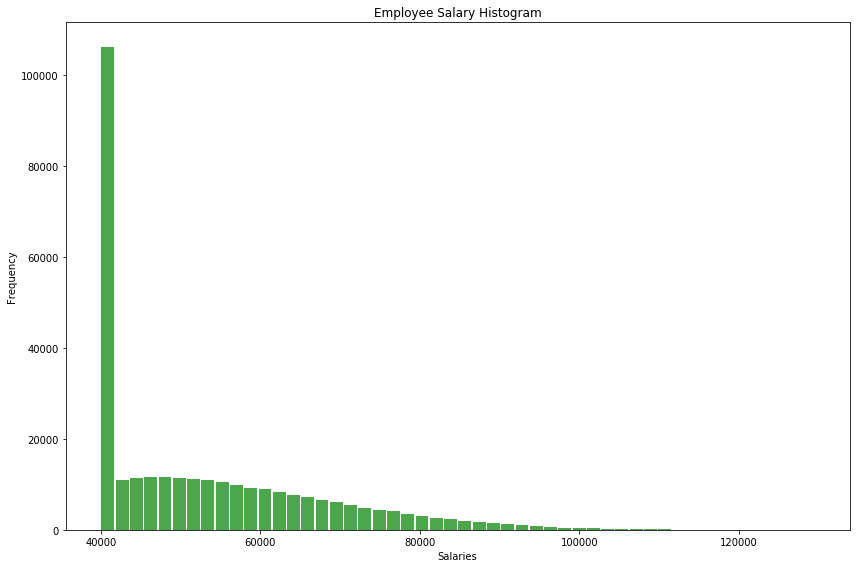

In [204]:
#axarr = salary_df.hist(column='salary', bins=50, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
axarr = salary_df.hist(column='salary', bins=50, grid=False, figsize=(12,8), color='g', zorder=2, rwidth=0.9, alpha=0.7)

for ax in axarr.flatten() :
    ax.set_xlabel("Salaries")
    ax.set_ylabel("Frequency")
    ax.set_title("Employee Salary Histogram")
    
plt.tight_layout()
plt.savefig("SalaryHistogram.png", dpi=100)

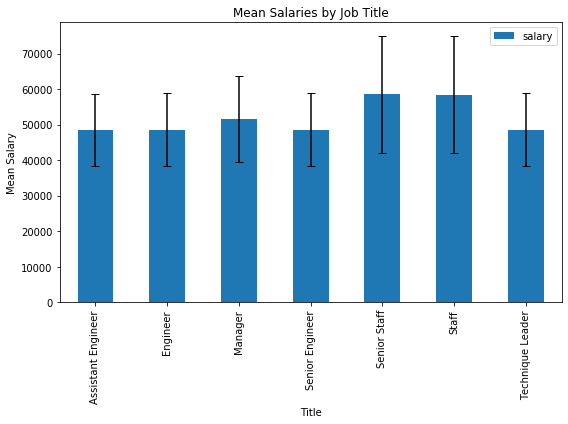

In [207]:
fig, ax = plt.subplots(figsize=(8,6))
means_df.plot(ax=ax, kind='bar', yerr=std_df['salary'], capsize=4)

ax.set_xlabel("Title")
ax.set_ylabel("Mean Salary")
ax.set_title("Mean Salaries by Job Title")
plt.tight_layout()
plt.savefig("MeanSalaries_x_Title.png", dpi=100)

# Analysis
* There are ~100,000 employees with salary = ~ $40,000
* Senior engineers, engineeers, and assistant engineerings all make about the same salary
* Staff and senior staff make the most.